In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.svm import  SVC
from sklearn.metrics import accuracy_score as ac
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [15]:
df=pd.read_excel("Genshin Impact Revenue.xlsx") #Dataset
df.dropna(inplace=True)

#Revenue class is divided into 'Above average' (revenue > average revenue), 'Below average'
df["Revenue Class"] = np.where(df["Revenue"]>df["Revenue"].mean(), "Above Average", "Below Average")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 0 to 38
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Version            39 non-null     float64
 1   Version Name       39 non-null     object 
 2   Start Date         39 non-null     object 
 3   End Date           39 non-null     object 
 4   5 Star Characters  39 non-null     object 
 5   Rerun              39 non-null     float64
 6   Mixed              39 non-null     float64
 7   Gender             39 non-null     object 
 8   Revenue            39 non-null     float64
 9   Banner Days        39 non-null     float64
 10  Avg Revenue/Day    39 non-null     float64
 11  Revenue Class      39 non-null     object 
dtypes: float64(6), object(6)
memory usage: 4.0+ KB


In [16]:
X=df.iloc[:,[0,5,6,9]]
y=df.loc[:,'Revenue Class']

In [17]:
#SVM Settings
svm = SVC(kernel='rbf', random_state=1, gamma=2.0, C=20.8)

#Train the model
svm.fit(X, y)

#Predict X
y_pred=svm.predict(X)

print(ac(y, y_pred))
cv_results = cross_val_score(svm, X, y, cv=5)
print(cv_results)
np.mean(cv_results)

0.9743589743589743
[0.625      0.625      0.625      0.625      0.28571429]


0.5571428571428572

In [18]:
#Random Forest Classifier Settings
clf = RandomForestClassifier(max_depth=2, random_state=0)

#Train the model
clf.fit(X, y)

cv_results = cross_val_score(clf, X, y, cv=5)
print(cv_results)
np.mean(cv_results)

[0.625      0.625      0.875      0.375      0.28571429]


0.5571428571428572

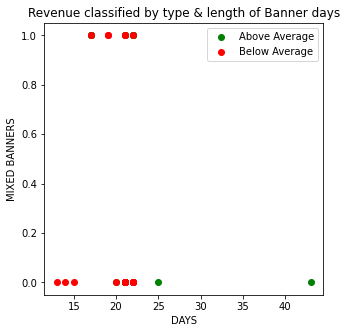

In [19]:
# Plotting mixed banners vs length of each banner
# if it's a mixed banner = 1, if not = 0
fig, plot = plt.subplots(figsize=(5,5))

x2 = df[["Banner Days", "Revenue Class"]]
y2 = df[["Mixed", "Revenue Class"]]
z2 = df["Revenue Class"]

plot.scatter(x2[x2["Revenue Class"]== "Above Average"]["Banner Days"], y2[y2["Revenue Class"]== "Above Average"]["Mixed"], color = "green", label = "Above Average")
plot.scatter(x2[x2["Revenue Class"]== "Below Average"]["Banner Days"], y2[y2["Revenue Class"]== "Below Average"]["Mixed"], color = "red", label = "Below Average")
plot.legend()

plot.set_xlabel("DAYS")
plot.set_ylabel("MIXED BANNERS")
plot.set_title("Revenue classified by type & length of Banner days")

plt.show()

In [8]:
#Train test split

#Assigning variable
x3 = df["Revenue"]
y3 = df["Revenue Class"]

#Dividing it into train set data and test set data.
x_train, x_test, y_train, y_test = train_test_split(x3, y3, test_size = 0.5, random_state = 9)

#Checking the train and test data
x_train
y_train
x_test
y_test

19    Below Average
17    Above Average
32    Below Average
4     Below Average
13    Below Average
2     Below Average
23    Below Average
15    Below Average
16    Below Average
21    Below Average
35    Above Average
20    Above Average
8     Below Average
30    Below Average
9     Below Average
7     Below Average
6     Below Average
5     Below Average
11    Below Average
3     Below Average
Name: Revenue Class, dtype: object

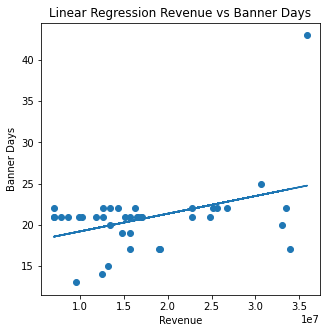

In [9]:
#Linear Regression Revenue vs Banner Days

#Assign variables
x4 = df["Revenue"]
y4 = df["Banner Days"] 

#Returns some important key values of Linear Regression
slope, intercept, r, p, std_err = stats.linregress(x4, y4)

#Calculate where on the y-axis the corresponding x value will be placed
def y_axis(x4):
  return slope * x4 + intercept

#New array with new values for the y-axis
model = list(map(y_axis, x4))

#Graph with Linear Regression
fig, plot = plt.subplots(figsize=(5,5))
plt.scatter(x4, y4)
plt.plot(x4, model)

#Labeling
plot.set_xlabel("Revenue")
plot.set_ylabel("Banner Days")
plot.set_title("Linear Regression Revenue vs Banner Days")

plt.show()

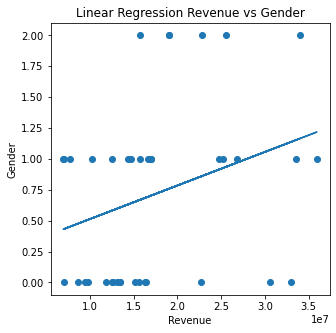

In [13]:
#Linear Regression Revenue vs Mixed Banners

#Assign variables
df.Gender = df.Gender.astype(int, copy=False)
x5 = df["Revenue"]
y5 = df["Gender"] 

#Returns some important key values of Linear Regression
slope, intercept, r, p, std_err = stats.linregress(x5, y5)

#Calculate where on the y-axis the corresponding x value will be placed
def y_axis(x5):
  return slope * x5 + intercept

#New array with new values for the y-axis
model = list(map(y_axis, x5))

#Graph with Linear Regression
fig, plot = plt.subplots(figsize=(5,5))
plt.scatter(x5, y5)
plt.plot(x5, model)

#Labeling
plot.set_xlabel("Revenue")
plot.set_ylabel("Gender")
plot.set_title("Linear Regression Revenue vs Gender")

plt.show()

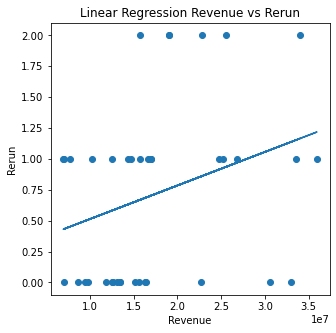

In [14]:
#Linear Regression Revenue vs Mixed Banners

#Assign variables
x6 = df["Revenue"]
y6 = df["Rerun"] 

#Returns some important key values of Linear Regression
slope, intercept, r, p, std_err = stats.linregress(x6, y6)

#Calculate where on the y-axis the corresponding x value will be placed
def y_axis(x6):
  return slope * x6 + intercept

#New array with new values for the y-axis
model = list(map(y_axis, x6))

#Graph with Linear Regression
fig, plot = plt.subplots(figsize=(5,5))
plt.scatter(x6, y6)
plt.plot(x6, model)

#Labeling
plot.set_xlabel("Revenue")
plot.set_ylabel("Rerun")
plot.set_title("Linear Regression Revenue vs Rerun")

plt.show()